# Tutorial on Hyperdimensional Computing
Translation to Python+numpy from https://michielstock.github.io/posts/2022/2022-10-04-HDVtutorial/

In [36]:
import math
import random
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
N = 10000

def hdv() -> np.ndarray:
    return np.random.choice([-1, 1], size=N)

In [3]:
x = hdv()
x

array([-1, -1, -1, ..., -1,  1,  1])

In [4]:
y = hdv()
y

array([ 1, -1, -1, ...,  1, -1, -1])

In [5]:
np.sum(x == y)

4971

In [6]:
def hdv_m(rows: int) -> NDArray:
    return np.random.choice([-1, 1], size=(rows, N))

In [7]:
V = hdv_m(10)
V

array([[ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1,  1, -1],
       [-1, -1,  1, ..., -1,  1,  1],
       ...,
       [ 1,  1,  1, ...,  1, -1,  1],
       [-1, -1,  1, ...,  1, -1,  1],
       [ 1,  1,  1, ..., -1, -1, -1]])

## Bundling

In [8]:
def bundle_m(U: NDArray[int]) -> NDArray[int]:
    if U.ndim != 2:
        raise ValueError("U must be a 2d array.")

    return np.sign(np.sum(U, axis=0))

# example
U = np.array([[1, 2],
              [-3, 4],
              [5, -6]])

result = bundle_m(U)
print(result)

[1 0]


In [9]:
bundle_m(V)

array([1, 0, 1, ..., 0, 0, 1])

In [10]:
def bundle(*xs: NDArray[int]) -> NDArray[int]:
    summed = np.add.reduce(xs)
    return np.sign(summed)

# example
xs = bundle(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
print(xs)

[1 0]


In [11]:
bundle(x, y)

array([ 0, -1, -1, ...,  0,  0,  0])

## Binding

In [12]:
def bind(*xs: NDArray[int]):
    return np.multiply.reduce(xs)

# example
xs = bind(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
bind(xs)

array([-15, -48])

In [13]:
bind(x, y)

array([-1,  1,  1, ..., -1, -1, -1])

In [14]:
np.array_equal(bind(bind(x, y), y),
               x)

True

In [15]:
np.array_equal(bind(bind(x, y), x), y)

True

## Shifting

In [16]:
def shift(x, k=1):
    return np.roll(x, k)

# example
shift([1, 2, 3])

array([3, 1, 2])

## Similarity between HDVs

In [33]:
def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# example
cos_similarity([1, 2, 3],
               [4, 5, 6])

0.9746318461970762

In [18]:
cos_similarity(x, y)

-0.0058

## Properties of the operations

In [19]:
z = hdv()

In [20]:
np.array_equal(bind(x, bundle(y, z)),
               bundle(bind(x, y), bind(x, z)))

True

In [21]:
np.array_equal(cos_similarity(x,y),
               cos_similarity(bind(x, z), bind(y, z)))

True

# Examples

## Example 1: color matching

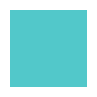

In [40]:
def randcol():
    return np.random.rand(3)

def show_color(color):
    plt.figure(figsize=(1,1))
    plt.imshow([[color]])
    plt.axis('off')
    plt.show()

acolor = randcol()
show_color(acolor)

In [23]:
emojis = ['🍌', '💦', '🥚', '🌅', '🐺', '🌱', '🚒']

In [24]:
toy_data1 = []
for i in range(100):
    toy_data1.append((np.random.choice(emojis), randcol()))

In [25]:
emojis_hdvs = {emoji: hdv() for emoji in emojis}

In [26]:
def range_hdvs(steps):
    k = len(steps) - 1

    V = hdv_m(k + 1)  # V size is (k+1)xN

    for i in range(1, k + 1):  # for each other row/step
        for j in range(N):     # for each column
            V[i, j] = -V[i-1, j] if random.random() < (1 / k) else V[i-1, j]

    return V


In [27]:
color_steps = np.arange(0, 1.05, 0.05)

In [28]:
reds_hdv = range_hdvs(color_steps)
print(reds_hdv.shape)

(21, 10000)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V0,0.1208,0.1326,0.1442,0.1644,0.1772,0.1944,0.2172,0.2460,0.2670,0.3046,...,0.3820,0.4186,0.4702,0.5302,0.5898,0.6576,0.7318,0.8114,0.9002,1.0000
V1,0.1362,0.1476,0.1616,0.1834,0.1970,0.2170,0.2406,0.2718,0.2996,0.3368,...,0.4258,0.4688,0.5252,0.5908,0.6612,0.7346,0.8148,0.9020,1.0000,0.9002
V2,0.1582,0.1660,0.1836,0.2102,0.2262,0.2466,0.2758,0.3094,0.3392,0.3796,...,0.4742,0.5204,0.5860,0.6584,0.7348,0.8142,0.9032,1.0000,0.9020,0.8114
V3,0.1738,0.1824,0.2012,0.2278,0.2466,0.2690,0.3034,0.3402,0.3768,0.4216,...,0.5266,0.5776,0.6476,0.7268,0.8096,0.8990,1.0000,0.9032,0.8148,0.7318
V4,0.1928,0.2058,0.2282,0.2556,0.2776,0.3024,0.3376,0.3776,0.4194,0.4690,...,0.5868,0.6410,0.7182,0.8046,0.8974,1.0000,0.8990,0.8142,0.7346,0.6576
V5,0.2130,0.2304,0.2560,0.2854,0.3114,0.3418,0.3786,0.4258,0.4744,0.5264,...,0.6562,0.7172,0.8036,0.8984,1.0000,0.8974,0.8096,0.7348,0.6612,0.5898
V6,0.2342,0.2564,0.2876,0.3226,0.3530,0.3858,0.4274,0.4786,0.5332,0.5920,...,0.7326,0.8004,0.8932,1.0000,0.8984,0.8046,0.7268,0.6584,0.5908,0.5302
V7,0.2622,0.2876,0.3196,0.3578,0.3978,0.4334,0.4790,0.5334,0.5936,0.6576,...,0.8170,0.8960,1.0000,0.8932,0.8036,0.7182,0.6476,0.5860,0.5252,0.4702
V8,0.2978,0.3248,0.3608,0.4022,0.4454,0.4838,0.5338,0.5914,0.6636,0.7356,...,0.9086,1.0000,0.8960,0.8004,0.7172,0.6410,0.5776,0.5204,0.4688,0.4186
V9,0.3176,0.3470,0.3862,0.4324,0.4828,0.5296,0.5876,0.6564,0.7342,0.8110,...,1.0000,0.9086,0.8170,0.7326,0.6562,0.5868,0.5266,0.4742,0.4258,0.3820


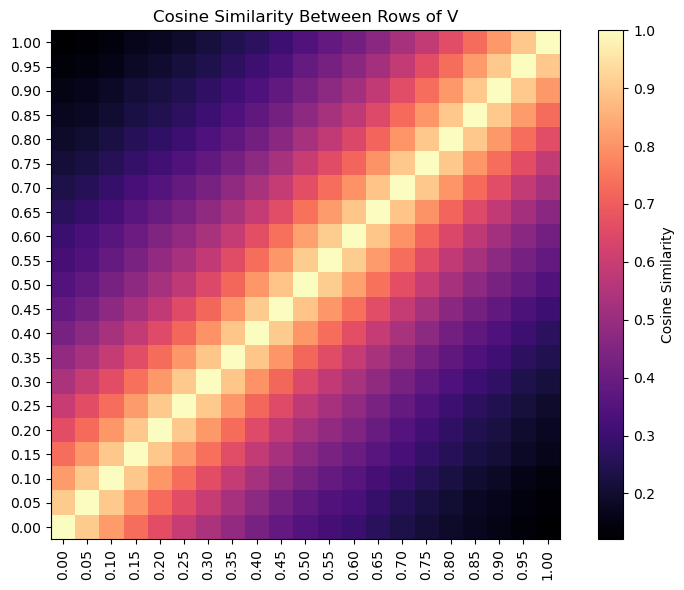

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similaridad coseno
cos_sim_matrix = cosine_similarity(reds_hdv)
cos_sim_matrix = cos_sim_matrix[::-1, :]

# Representar la matriz de similaridad como DataFrame para mejor visualización
df_cos_sim = pd.DataFrame(cos_sim_matrix,
                          index=[f"V{i}" for i in range(reds_hdv.shape[0])],
                          columns=[f"V{i}" for i in range(reds_hdv.shape[0])])

# Mostrar en formato tabla
display(df_cos_sim)

# Representar la matriz de similaridad coseno con un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(cos_sim_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Between Rows of V")
plt.xticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps], rotation=90)
plt.yticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps[::-1]])

plt.tight_layout()
plt.show()


In [35]:
greens_hdv = range_hdvs(color_steps)
blues_hdv = range_hdvs(color_steps)

In [45]:
def col_ind(component):
    return round(component * 20)

def encode_col(color):
    return bind(reds_hdv[col_ind(color[0])],
                greens_hdv[col_ind(color[1])],
                blues_hdv[col_ind(color[2])])

In [46]:
colhdv = encode_col(acolor)

In [47]:
ref_colors = [{'color':c, 'hdv':encode_col(c)} for c in [randcol() for _ in range(1000)]]

In [48]:
def decode_colors(v):
    best_match = max(ref_colors, key=lambda item: cosine_similarity(v, item["hdv"]))
    return best_match["color"]

In [49]:
decode_colors(colhdv)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1. -1.  1. ...  1. -1.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.